In [4]:
import pandas as pd

In [2]:
pd.set_option("display.max_rows", False)
pd.set_option("display.max_columns", False)

In [5]:
df = pd.read_csv("survey_results_public.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
rs = pd.read_csv("survey_results_schema.csv", index_col='Column').QuestionText

In [7]:
rs

Column
Respondent                Randomized respondent ID number (not in order ...
MainBranch                Which of the following options best describes ...
Hobbyist                                            Do you code as a hobby?
Age                       What is your age (in years)? If you prefer not...
Age1stCode                At what age did you write your first line of c...
CompFreq                   Is that compensation weekly, monthly, or yearly?
CompTotal                 What is your current total compensation (salar...
ConvertedComp             Salary converted to annual USD salaries using ...
Country                                                  Where do you live?
CurrencyDesc              Which currency do you use day-to-day? If your ...
CurrencySymbol            Which currency do you use day-to-day? If your ...
DatabaseDesireNextYear    Which database environments have you done exte...
                                                ...                        
SOPar

## Data Prepartion & Cleaning

We will be limiting our analysis to following areas:
* Demographic of survey respondents & global programming community
* Distribution of programming skills, experience and preferences
* Employment related information

Let's select a subset of columns with relevant data for our analysis

In [6]:
sel_col = ['Age', 'Country', 'EdLevel', 'Ethnicity', 'Gender', 'UndergradMajor', 
           'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',
           'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt']

In [9]:
sv = df[sel_col].copy()
ch = rs[sel_col]

In [16]:
sv.shape

(64461, 21)

In [17]:
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45446 non-null  float64
 1   Country                 64072 non-null  object 
 2   EdLevel                 57431 non-null  object 
 3   Ethnicity               45948 non-null  object 
 4   Gender                  50557 non-null  object 
 5   UndergradMajor          50995 non-null  object 
 6   Hobbyist                64416 non-null  object 
 7   Age1stCode              57900 non-null  object 
 8   YearsCode               57684 non-null  object 
 9   YearsCodePro            46349 non-null  object 
 10  LanguageWorkedWith      57378 non-null  object 
 11  LanguageDesireNextYear  54113 non-null  object 
 12  NEWLearn                56156 non-null  object 
 13  NEWStuck                54983 non-null  object 
 14  Employment              63854 non-null

<br>Only 2 columns,  <i> Age </i> and <i> WorkWeekHrs </i>, were detected as numeric columns, even though there are a few other columns which have mostly numeric value. <br>So let's check what is happening in those columns.

In [18]:
sv.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [19]:
sv.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [20]:
sv.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

<br>As you can see, certain values are non- numeric. To make our analysis easier, let's convert them into numeric data types, ignoring any non-numeric values (they will get converted to NaNs).

In [36]:
sv['Age1stCode'] = pd.to_numeric(sv.Age1stCode, errors='coerce')
sv['YearsCode'] = pd.to_numeric(sv.YearsCode, errors='coerce')
sv['YearsCodePro'] = pd.to_numeric(sv.YearsCodePro, errors='coerce')

<br>The to_numeric() function is used to convert a column or a Series into numeric data type. The <i>errors='coerce' </i>parameter specifies that if there are any errors during conversion (e.g., non-numeric values that cannot be converted), they should be converted to NaN (missing values).

In [22]:
sv.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


<br>There seem to be a problem with age column as the minimum age is 1 and max age is 279, both unlikely to be correct. <br>A simple fix would be to ignore rows where the value of age is lesser than 10 and higher than 100 as invalid survey responses. <br>We can do this using .drop method

In [37]:
sv.drop(sv[sv.Age < 10].index, inplace=True)
sv.drop(sv[sv.Age > 100].index, inplace=True)

<br>Same can be said for WorkWeekHrs. Let's ignore entries where the value for the column is higher tha 140hrs. (~20 hrs per day)

In [24]:
sv.drop(sv[sv.WorkWeekHrs > 140].index, inplace=True)

<br>Now Let us explore <i> Gender </i> and <i> Ethnicity </i>.

In [25]:
sv['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [26]:
sv.Ethnicity.value_counts()

Ethnicity
White or of European descent                                                                                                                                                                                           29237
South Asian                                                                                                                                                                                                             4462
Hispanic or Latino/a/x                                                                                                                                                                                                  2252
Southeast Asian                                                                                                                                                                                                         1685
Black or of African descent                                                                               

<br>In both <i> Gender </i> and <i> Ethnicity </i> we can see that there are many entries with multiple values. <br>So we replace such rows with null value.

In [27]:
import numpy as np

In [28]:
sv.where(~(sv.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [29]:
sv.where(~(sv.Ethnicity.str.contains(';', na=False)), np.nan, inplace=True)

In [30]:
sv.Gender.value_counts()

Gender
Man                                                  43541
Woman                                                 3613
Non-binary, genderqueer, or gender non-conforming      345
Name: count, dtype: int64

In [31]:
sv.Ethnicity.value_counts()

Ethnicity
White or of European descent                                                        29083
South Asian                                                                          4451
Hispanic or Latino/a/x                                                               2244
Southeast Asian                                                                      1677
Black or of African descent                                                          1673
East Asian                                                                           1662
Middle Eastern                                                                       1611
Multiracial                                                                           288
Biracial                                                                              148
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)       60
Name: count, dtype: int64

In [32]:
sv[['Ethnicity', 'Gender']].isnull().sum()

Ethnicity    21409
Gender       16807
dtype: int64

In [33]:
sv

,Age,Country,EdLevel,Ethnicity,Gender,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,NaN,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
5,NaN,Germany,"Secondary school (e.g. American high school, G...",White or of European descent,Man,NaN,No,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important
6,NaN,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important
7,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,JavaScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
8,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,Man,"Computer science, computer engineering, or sof...",No,20.0,6.0,4.0,HTML/CSS;JavaScript;PHP,Python;Rust,Once a year,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important
9,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important


## Exploratory Analysis and Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

#### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [35]:
sv['Country'].nunique()

183

In [36]:
top_cntry = sv.Country.value_counts().head(15)

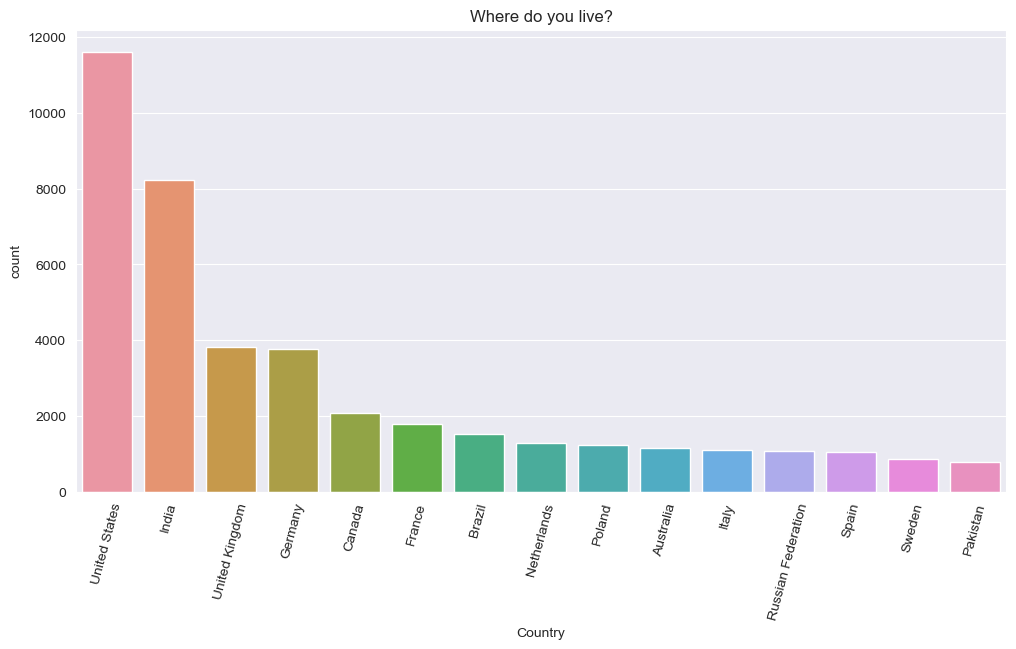

In [37]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(rs.Country)
sns.barplot(x=top_cntry.index, y=top_cntry)
plt.show()

The bar graph shows that the United States has the highest number of survey respondents, followed by India. Together, both countries make up a huge portion of the survey respondents, indicating that the survey may not be representative of the global programming community.

#### Age

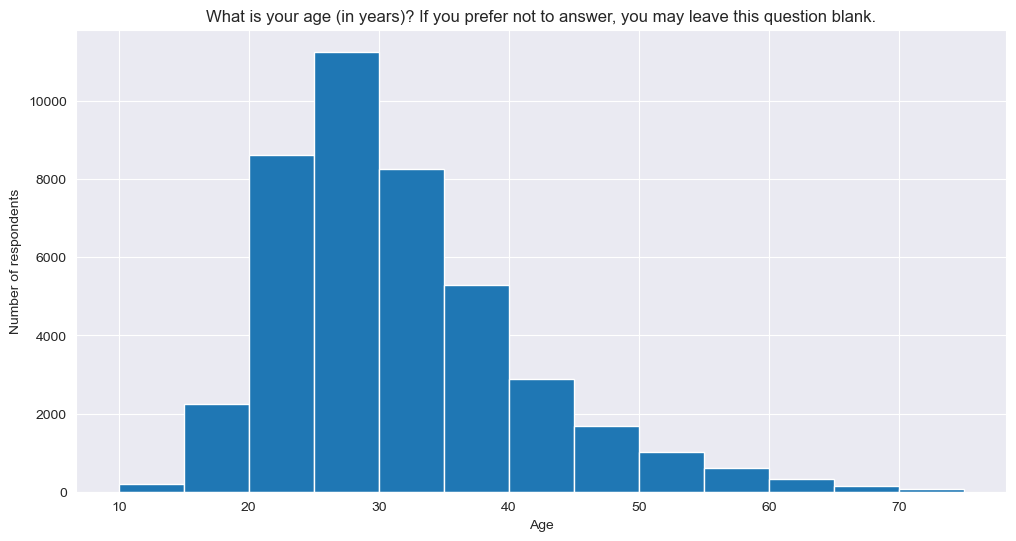

In [38]:
plt.figure(figsize=(12,6))
plt.title(rs.Age)
plt.xlabel("Age")
plt.ylabel("Number of respondents")
plt.hist(sv.Age, bins=np.arange(10,80,5))
plt.show()

The graph exhibits a right-skewed distribution, where the majority of respondents are concentrated in their 20s and early 30s. <br>There is a noticeable decline in the number of respondents as age increases beyond 30s, with only a small fraction being above 60 years old. <br>From this observation, we can conclude that the survey appealed more to a younger demographic, suggesting that the survey topic or method of distribution was particularly relevant or accessible to this group.

#### Gender

In [39]:
gndr = sv['Gender'].value_counts(dropna=False)
gndr

Gender
Man                                                  43541
NaN                                                  16807
Woman                                                 3613
Non-binary, genderqueer, or gender non-conforming      345
Name: count, dtype: int64

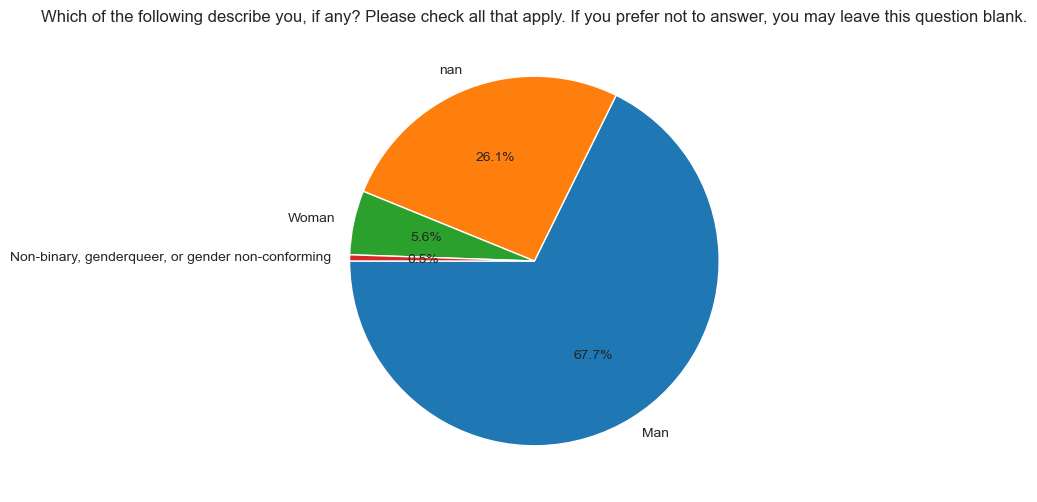

In [40]:
plt.figure(figsize = (12, 6))
plt.title(rs.Gender)
plt.pie(gndr, labels=gndr.index, autopct="%1.1f%%", startangle=180)
plt.show()

The survey data indicates a significant gender disparity, with 67% of respondents identifying as male and only about 5% as female.
The representation of non-binary individuals is notably low in comparison to male and female respondents. <br>Despite efforts towards inclusivity, these numbers suggest that programming remains predominantly male-dominated, highlighting ongoing challenges in achieving gender diversity within the field.

#### EdLevel

In [41]:
ed = sv.EdLevel.value_counts()

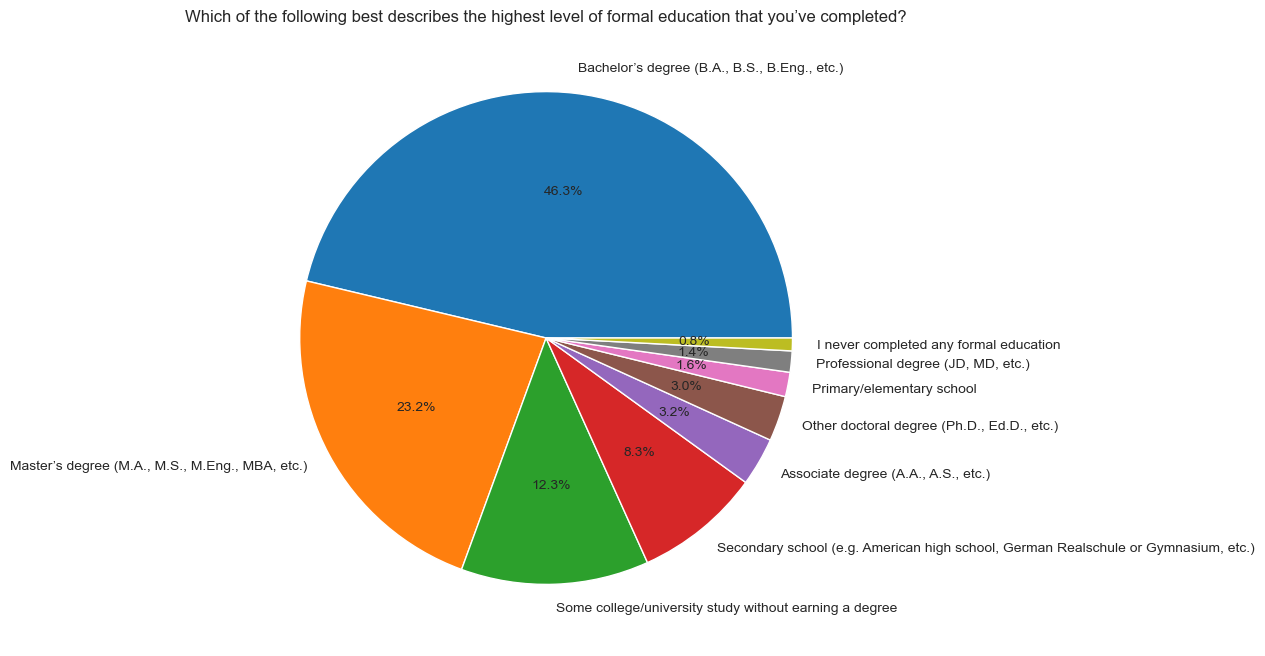

In [42]:
plt.figure(figsize=(12,8))
plt.pie(ed, labels=ed.index, autopct="%1.1f%%")
plt.title(rs.EdLevel)
plt.show()

More than 60% of programmers in the dataset are college graduates, highlighting a significant level of educational achievement among participants. <br>Additionally, the majority of programmers have received some form of formal education, indicating the prevalence of educational backgrounds in this profession. <br>This suggests a strong emphasis on academic qualifications within the programming community.

#### UndergradMajor

Let's plot undergraduate majors, but this time we'll convert the numbers into percentages, and sort by percentage values to make it easier to visualize the order.

In [43]:
rs.UndergradMajor

'What was your primary field of study?'

In [44]:
ugmp = sv.UndergradMajor.value_counts()*100/sv.UndergradMajor.count()

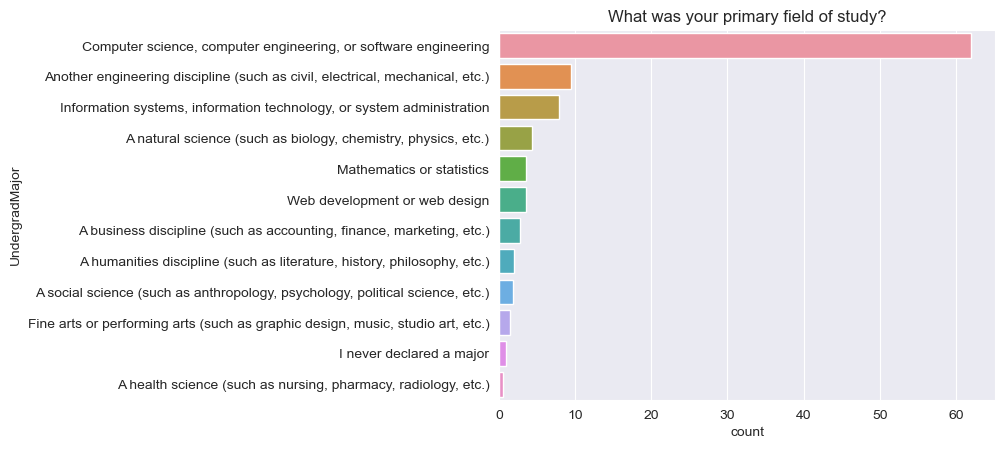

In [45]:
plt.title(rs.UndergradMajor)
sns.barplot(x=ugmp, y=ugmp.index)
plt.show()

More than 60% of respondents are computer science, computer engineering or software engineering graduates while the rest comes from non-computer science background.

Let's find out what percentage of people belonging to different undrgraduate background think formal education is important to learn to code.

In [46]:
print(rs.NEWEdImpt)
ne = sv.NEWEdImpt.value_counts()
ne

How important is a formal education, such as a university degree in computer science, to your career?


NEWEdImpt
Fairly important                      12030
Very important                        11284
Somewhat important                    10754
Not at all important/not necessary     7346
Critically important                   4481
Name: count, dtype: int64

In [47]:
gr = sv[['UndergradMajor', 'NEWEdImpt']]
gr = gr.groupby('UndergradMajor')['NEWEdImpt'].value_counts()
gr = gr.reset_index(name='count')
gr['Total_count'] = gr.groupby('UndergradMajor')['count'].transform('sum')
gr['pct'] = gr['count']*100/gr['Total_count']

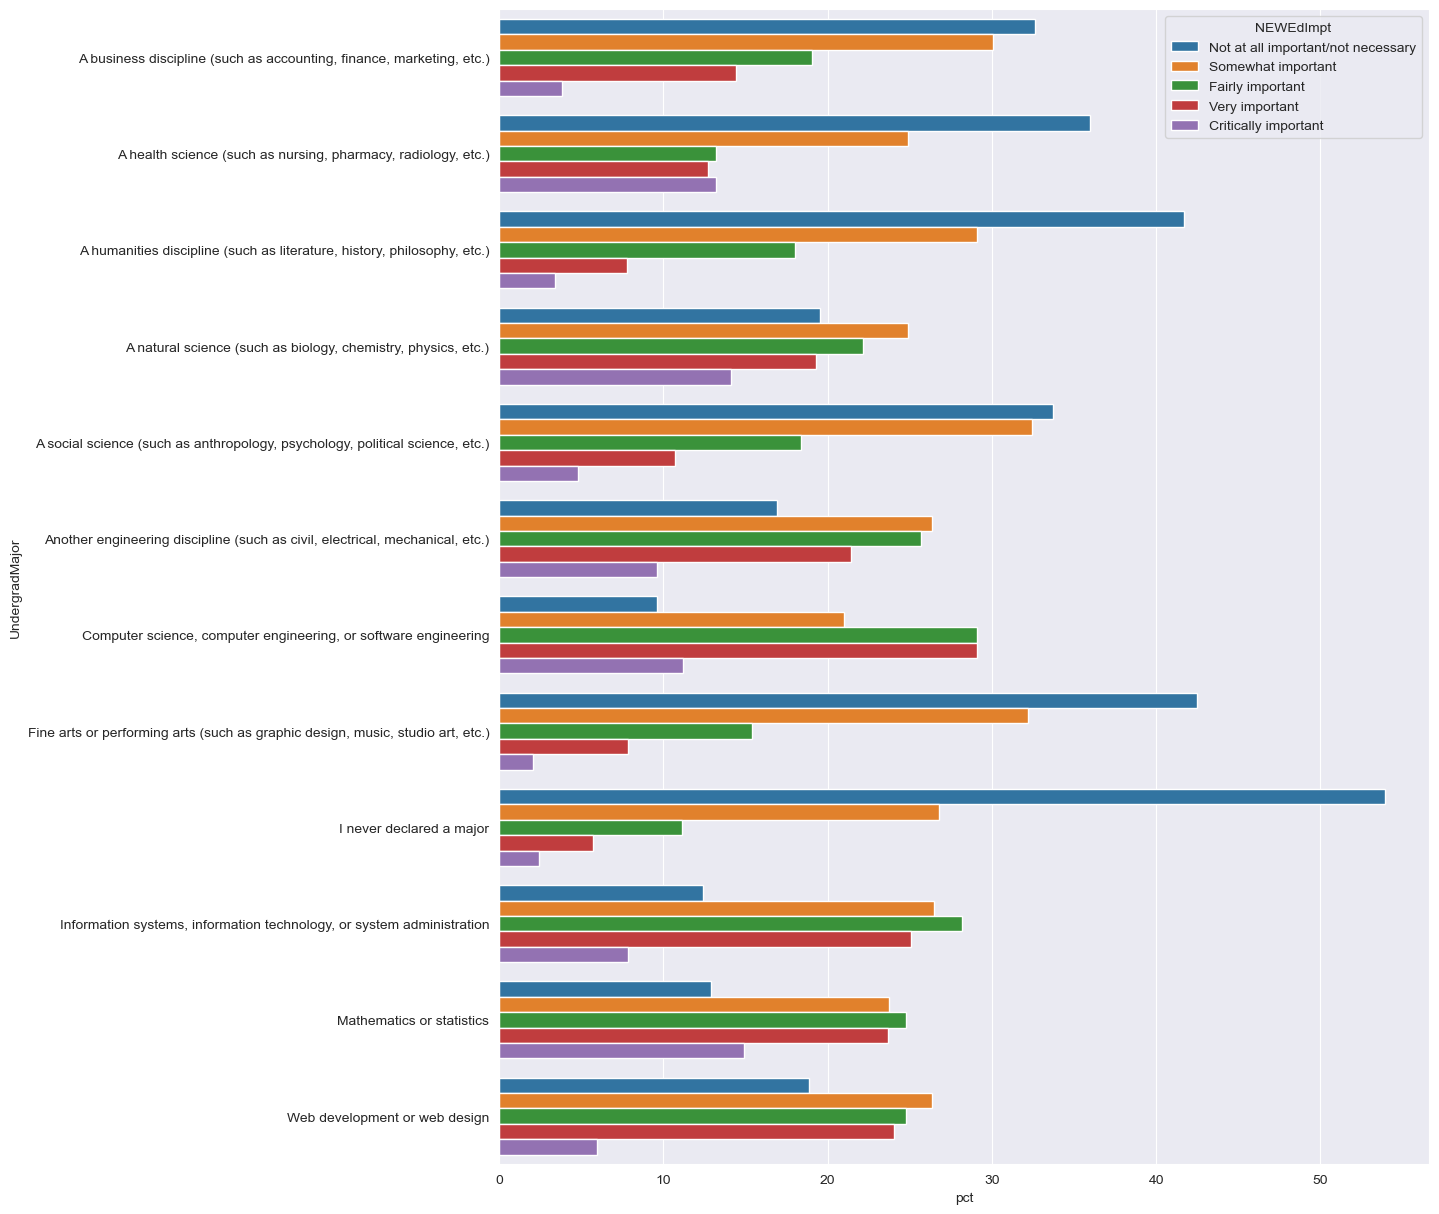

In [48]:
plt.figure(figsize=(12,15))
barplot = sns.barplot(data=gr, y='UndergradMajor', x='pct', hue='NEWEdImpt')
plt.show()

It seems most people from non-computer science backgrounds feel that formal education in computer science is unnecessary to become a programmer. In contrast, less than 10% of computer science majors share this sentiment. 

#### Employment

In [49]:
rs.Employment

'Which of the following best describes your current employment status?'

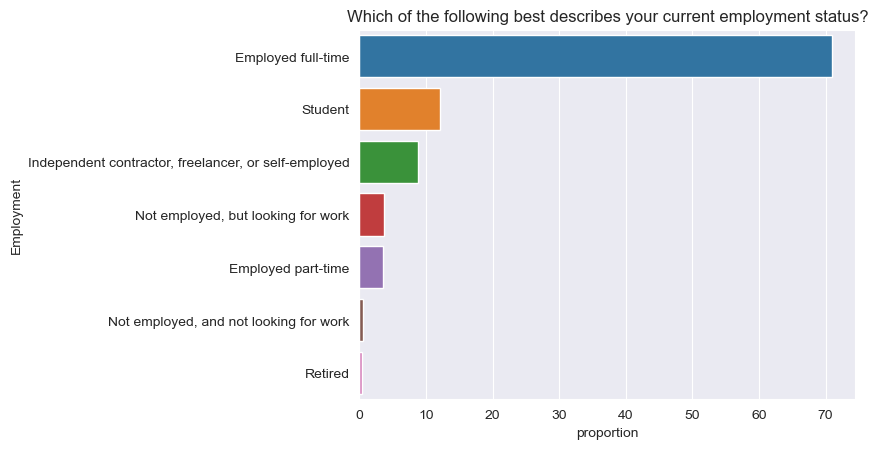

In [50]:
sns.barplot(y=sv.Employment.value_counts().index, x=sv.Employment.value_counts(normalize=True)*100)
plt.title(rs.Employment)
plt.show()

Almost 70% people are full-time employed. <br>

Let us create a new column called EmploymentType which contains values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired).<br>
We can then find the preferred languages for each category.

In [51]:
rs.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [52]:
eg = sv[['Employment', 'LanguageWorkedWith']]
eg = eg.groupby('Employment')['LanguageWorkedWith'].value_counts()
eg = eg.reset_index(name='count')
eg

,Employment,LanguageWorkedWith,count
0,Employed full-time,HTML/CSS;JavaScript;PHP;SQL,710
1,Employed full-time,C#;HTML/CSS;JavaScript;SQL,694
2,Employed full-time,C#;HTML/CSS;JavaScript;SQL;TypeScript,621
3,Employed full-time,HTML/CSS;JavaScript,578
4,Employed full-time,HTML/CSS;JavaScript;TypeScript,565
5,Employed full-time,Java,392
6,Employed full-time,Python,372
7,Employed full-time,HTML/CSS;JavaScript;PHP,369
8,Employed full-time,HTML/CSS;Java;JavaScript;SQL,313
9,Employed full-time,C#,305


In [53]:
cond = [(eg['Employment'].isin(['Student', 'Not employed, bit looking for work'])), 
        (eg['Employment'].isin(['Employed full-time', 'Independent contractor, freeelancer, or self-employed', 'Employed part-time']))
       ]
val = ['Enthusiast', 'Professional']
eg['EmploymentType'] = np.select(cond, val, default='Other')
eg.drop(columns = ['Employment'], inplace=True, axis=1)
eg

,LanguageWorkedWith,count,EmploymentType
0,HTML/CSS;JavaScript;PHP;SQL,710,Professional
1,C#;HTML/CSS;JavaScript;SQL,694,Professional
2,C#;HTML/CSS;JavaScript;SQL;TypeScript,621,Professional
3,HTML/CSS;JavaScript,578,Professional
4,HTML/CSS;JavaScript;TypeScript,565,Professional
5,Java,392,Professional
6,Python,372,Professional
7,HTML/CSS;JavaScript;PHP,369,Professional
8,HTML/CSS;Java;JavaScript;SQL,313,Professional
9,C#,305,Professional


As we can see the column <i> LanguageWorkedWith </i> has multiple values in it. So we need to split it inorder to properly process these values.

In [54]:
ls = eg['LanguageWorkedWith'].str.split(';', expand=True)
eg = pd.concat([eg, ls], axis=1)
eg.drop(columns=['LanguageWorkedWith'], inplace=True)
eg

,count,EmploymentType,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,710,Professional,HTML/CSS,JavaScript,PHP,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,694,Professional,C#,HTML/CSS,JavaScript,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,621,Professional,C#,HTML/CSS,JavaScript,SQL,TypeScript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,578,Professional,HTML/CSS,JavaScript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,565,Professional,HTML/CSS,JavaScript,TypeScript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,392,Professional,Java,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,372,Professional,Python,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,369,Professional,HTML/CSS,JavaScript,PHP,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,313,Professional,HTML/CSS,Java,JavaScript,SQL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,305,Professional,C#,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [55]:
lc = ls.stack().value_counts()
lc

JavaScript               12308
HTML/CSS                 11682
SQL                      10530
Python                   10379
Java                      9697
Bash/Shell/PowerShell     8220
C++                       7417
C                         7179
C#                        6558
PHP                       5926
TypeScript                5302
Go                        3197
Kotlin                    2810
Assembly                  2677
Ruby                      2408
Swift                     2360
Rust                      2212
R                         2020
VBA                       2000
Dart                      1696
Objective-C               1694
Perl                      1356
Scala                     1339
Haskell                   1030
Julia                      369
Name: count, dtype: int64

In [56]:
prf = eg.where(eg['EmploymentType'] == 'Professional')
prf.dropna(subset=['EmploymentType'], inplace=True)
pfr_c = prf.stack().value_counts()
pfr_c.dropna(inplace=True)
pfr_ct = pfr_c[pfr_c.index.str.contains('[a-zA-Z]', na=False)]
pfr_ct.drop(index='Professional', inplace=True)

In [57]:
eth = eg.where(eg.EmploymentType == 'Enthusiast')
eth.dropna(subset=['EmploymentType'],inplace=True)
eth_c = eth.stack().value_counts()
eth_ct = eth_c[eth_c.index.str.contains('[a-zA-Z]', na=False)]
eth_ct.drop(index='Enthusiast', inplace=True)

In [58]:
oth = eg.where(eg.EmploymentType == 'Other')
oth.dropna(subset=['EmploymentType'], inplace=True)
oth_c = oth.stack().value_counts()
oth_ct = oth_c[oth_c.index.str.contains('[a-zA-Z]', na=False)]
oth_ct.drop(index='Other', inplace=True)
oth_ct

JavaScript               2583
HTML/CSS                 2521
SQL                      2204
Python                   1936
Java                     1749
Bash/Shell/PowerShell    1456
C++                      1376
C                        1340
PHP                      1305
C#                       1243
TypeScript               1035
Assembly                  498
Go                        498
Kotlin                    463
Swift                     454
Ruby                      443
VBA                       418
Dart                      337
Objective-C               335
Rust                      332
R                         317
Perl                      238
Scala                     169
Haskell                   136
Julia                      55
Name: count, dtype: int64

In [59]:
lang_c = pd.concat([pfr_ct, eth_ct, oth_ct], keys=['Professional', 'Enthusiast', 'Others'], axis=1)
lang_c.reset_index(inplace=True)
lang_c = lang_c.melt(id_vars='index', var_name='Group', value_name='Count')
lang_c['total'] = lang_c.groupby('Group')['Count'].transform('sum')
lang_c['pct'] = lang_c.Count*100/lang_c.total
lang_c

,index,Group,Count,total,pct
0,JavaScript,Professional,7699,77289,9.961314
1,HTML/CSS,Professional,6961,77289,9.006456
2,SQL,Professional,6728,77289,8.704990
3,Python,Professional,6317,77289,8.173220
4,Java,Professional,6038,77289,7.812237
5,Bash/Shell/PowerShell,Professional,5443,77289,7.042399
6,C++,Professional,4374,77289,5.659279
7,C#,Professional,4222,77289,5.462614
8,C,Professional,4173,77289,5.399216
9,PHP,Professional,3655,77289,4.729004


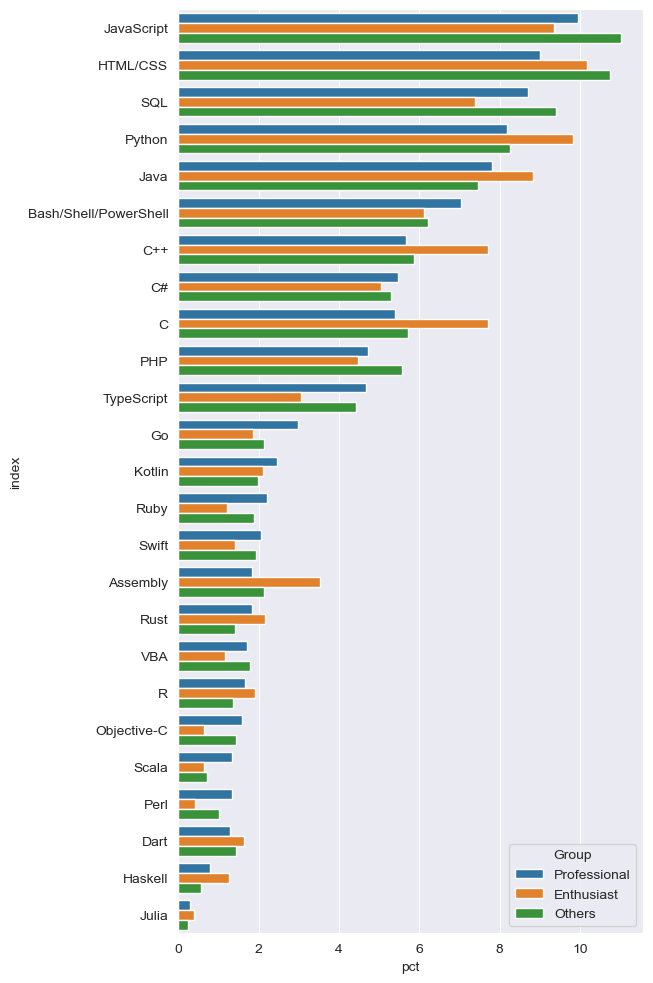

In [60]:
plt.figure(figsize=(6,12))
sns.barplot(data=lang_c, y='index', x='pct', hue='Group')
#plt.xticks(rotation=90)
plt.show()

While professionals and others mostly use JavaScript and HTML/CSS, students tends to prefer Python more.

#### DevType

What Job does woman do most??

In [61]:
rs.DevType

'Which of the following describe you? Please select all that apply.'

In [62]:
sv.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                                                                           4230
Developer, back-end                                                                                                                                                                                                                                                                             2935
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                                  2107
Developer, back-end;Developer, full-stack                                                                        

In [11]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [64]:
dev = split_multicolumn(sv.DevType)
dev

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
dev.sum().sort_values(ascending=False)

Developer, back-end                              25658
Developer, full-stack                            25566
Developer, front-end                             17204
Developer, desktop or enterprise applications    11135
Developer, mobile                                 8940
DevOps specialist                                 5587
Database administrator                            5373
Designer                                          4965
System administrator                              4874
Developer, embedded applications or devices       4462
Data or business analyst                          3764
Data scientist or machine learning specialist     3726
Developer, QA or test                             3685
Engineer, data                                    3490
Academic researcher                               3328
Educator                                          2708
Developer, game or graphics                       2583
Engineering manager                               2531
Product ma

In [66]:
dv = pd.merge(left=sv.Gender, right=dev, on=dev.index)
dv = dv.drop(columns=['key_0'])
dv = dv.groupby('Gender').sum()
dv.reset_index(inplace=True)
dv = dv.melt(id_vars='Gender', var_name='Job', value_name='count')
dv['Total'] = dv.groupby('Gender')['count'].transform('sum')
dv['pct'] = dv['count']*100/dv.Total
dv

,Gender,Job,count,Total,pct
0,Man,"Developer, desktop or enterprise applications",9295,120230,7.731016
1,"Non-binary, genderqueer, or gender non-conforming","Developer, desktop or enterprise applications",55,863,6.373117
2,Woman,"Developer, desktop or enterprise applications",411,7414,5.543566
3,Man,"Developer, full-stack",20923,120230,17.402479
4,"Non-binary, genderqueer, or gender non-conforming","Developer, full-stack",147,863,17.033604
5,Woman,"Developer, full-stack",1374,7414,18.532506
6,Man,"Developer, mobile",7228,120230,6.011811
7,"Non-binary, genderqueer, or gender non-conforming","Developer, mobile",36,863,4.171495
8,Woman,"Developer, mobile",430,7414,5.799838
9,Man,Designer,3877,120230,3.224653


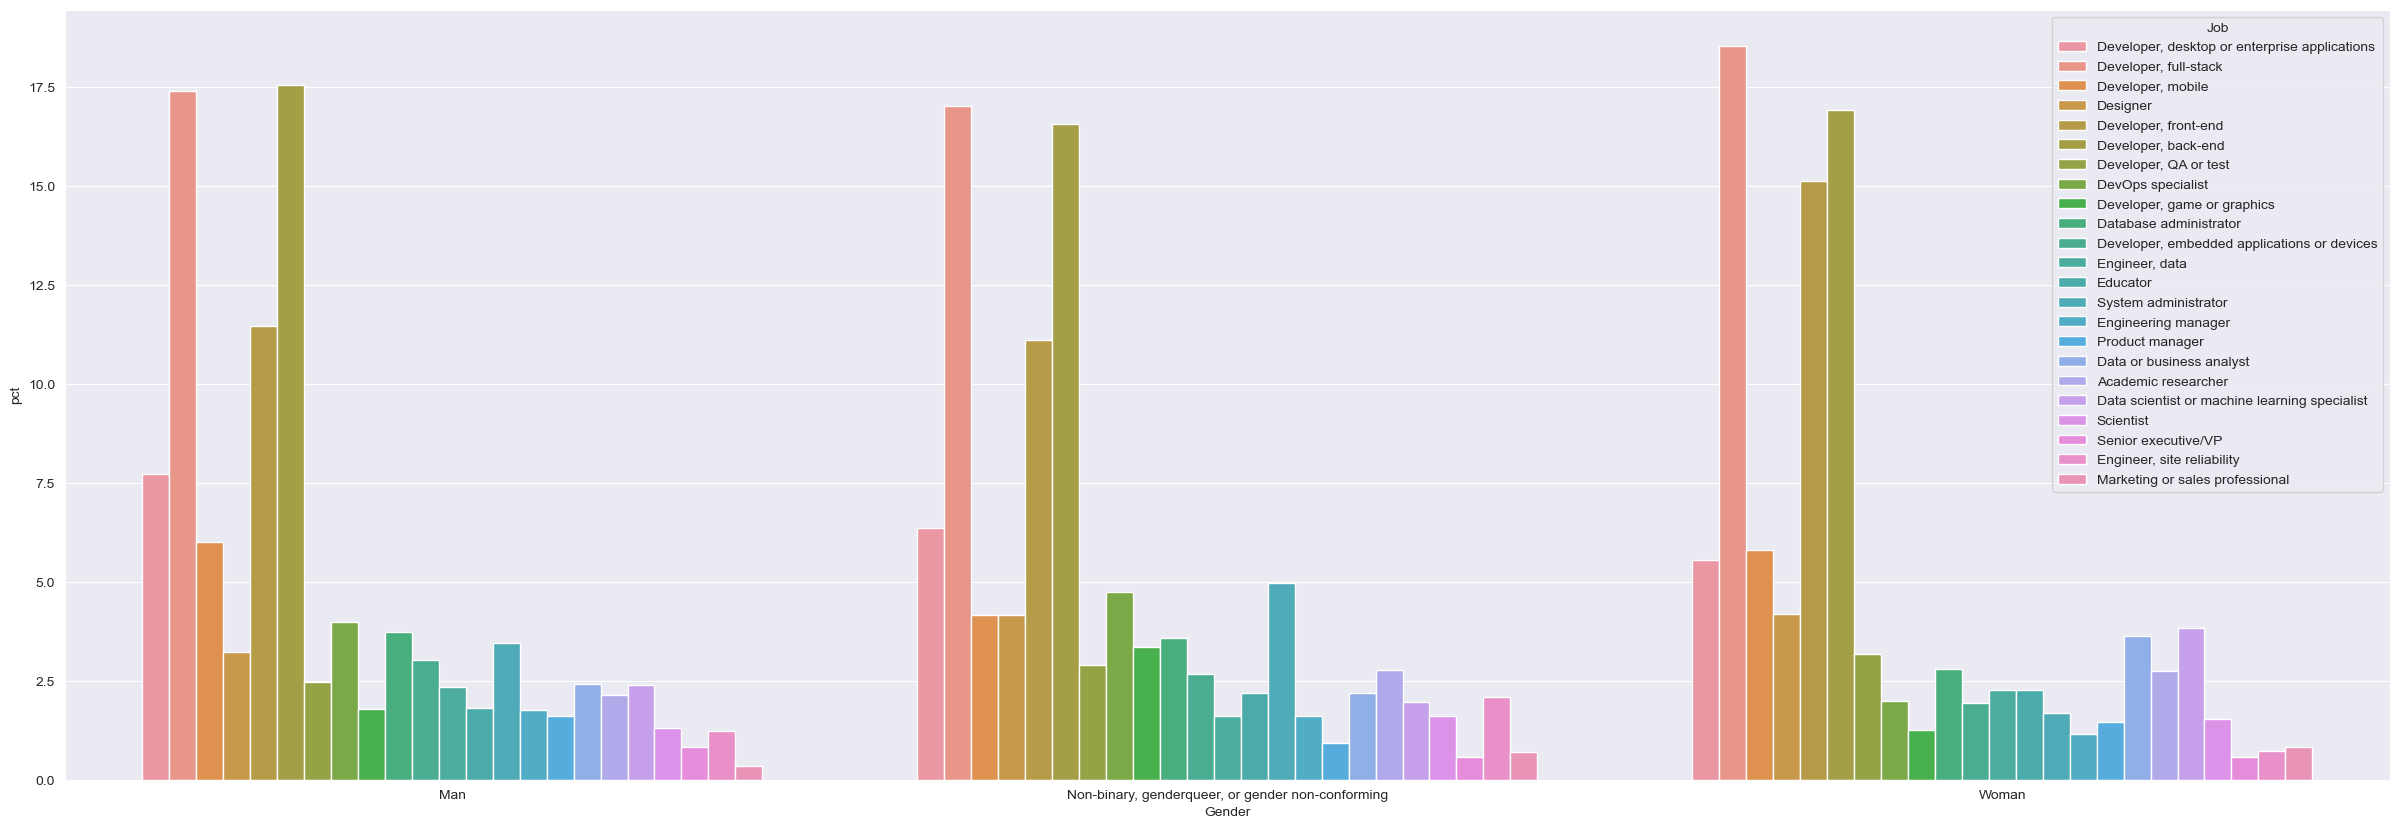

In [67]:
plt.figure(figsize=(30,10))
sns.barplot(data=dv, x='Gender', y='pct', hue='Job')
plt.show()

From the data, it is evident that the majority of women respondents identify as full-stack developers. Additionally, full-stack development is the predominant role among programmers, regardless of gender. This is followed by significant numbers of developers working in both frontend and backend roles.

In [68]:
sv

,Age,Country,EdLevel,Ethnicity,Gender,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,NaN,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
5,NaN,Germany,"Secondary school (e.g. American high school, G...",White or of European descent,Man,NaN,No,14.0,6.0,4.0,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,Once a year,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",NaN,Slightly satisfied,Diversity of the company or organization;Langu...,Never,Fairly important
6,NaN,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,"Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Very important
7,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Man,"Computer science, computer engineering, or sof...",Yes,12.0,17.0,13.0,Python;SQL,JavaScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",39.0,Slightly dissatisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
8,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,Man,"Computer science, computer engineering, or sof...",No,20.0,6.0,4.0,HTML/CSS;JavaScript;PHP,Python;Rust,Once a year,Meditate,"Independent contractor, freelancer, or self-em...","Developer, full-stack",50.0,Very dissatisfied,Diversity of the company or organization;Remot...,Occasionally: 1-2 days per quarter but less th...,Very important
9,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,Mathematics or statistics,Yes,14.0,8.0,4.0,HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;R;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Database administrator;Developer, full-stack;D...",36.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Fairly important


## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020?

In [72]:
sv.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
5                                 HTML/CSS;Java;JavaScript
6                                          C#;HTML/CSS;PHP
7                                               Python;SQL
8                                  HTML/CSS;JavaScript;PHP
9                      HTML/CSS;Java;JavaScript;Python;SQL
10                                     C#;JavaScript;Swift
11                                     HTML/CSS;JavaScript
12                                     C;JavaScript;Python
13                      HTML/CSS;JavaScript;SQL;TypeScript
14        Bash/Shell/PowerShell;C;HTML/CSS;Java;Python;SQL
                               ...                        
64446    Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J.

In [19]:
p_lang = split_multicolumn(sv.LanguageWorkedWith)

In [85]:
l = p_lang.sum().sort_values(ascending=False).reset_index()
l.columns = ['Language', 'Count']

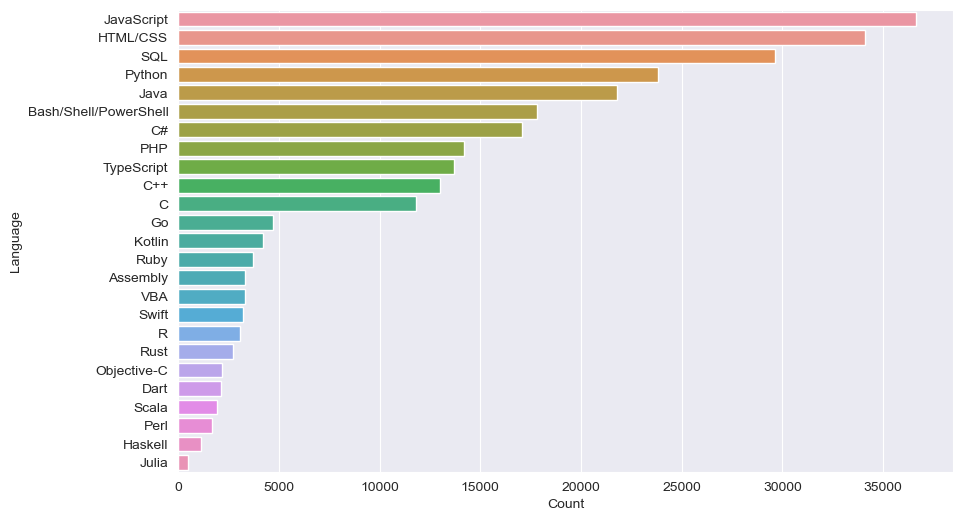

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=l, y="Language", x="Count")
plt.show()

#### Q: Which languages are the most people interested to learn over the next yea

In [13]:
languages_interested_df = split_multicolumn(sv.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.392470
JavaScript               40.626115
HTML/CSS                 32.222584
SQL                      30.979972
TypeScript               26.605234
C#                       21.212826
Java                     20.576783
Go                       19.554459
Bash/Shell/PowerShell    18.193947
Rust                     16.386652
C++                      15.134733
Kotlin                   14.853943
PHP                      11.023720
C                         9.449124
Swift                     8.754130
Dart                      7.356386
R                         6.625712
Ruby                      6.490746
Scala                     5.375343
Haskell                   4.647772
Assembly                  3.830223
Julia                     2.576752
Objective-C               2.365772
Perl                      1.784024
VBA                       1.636649
dtype: float64

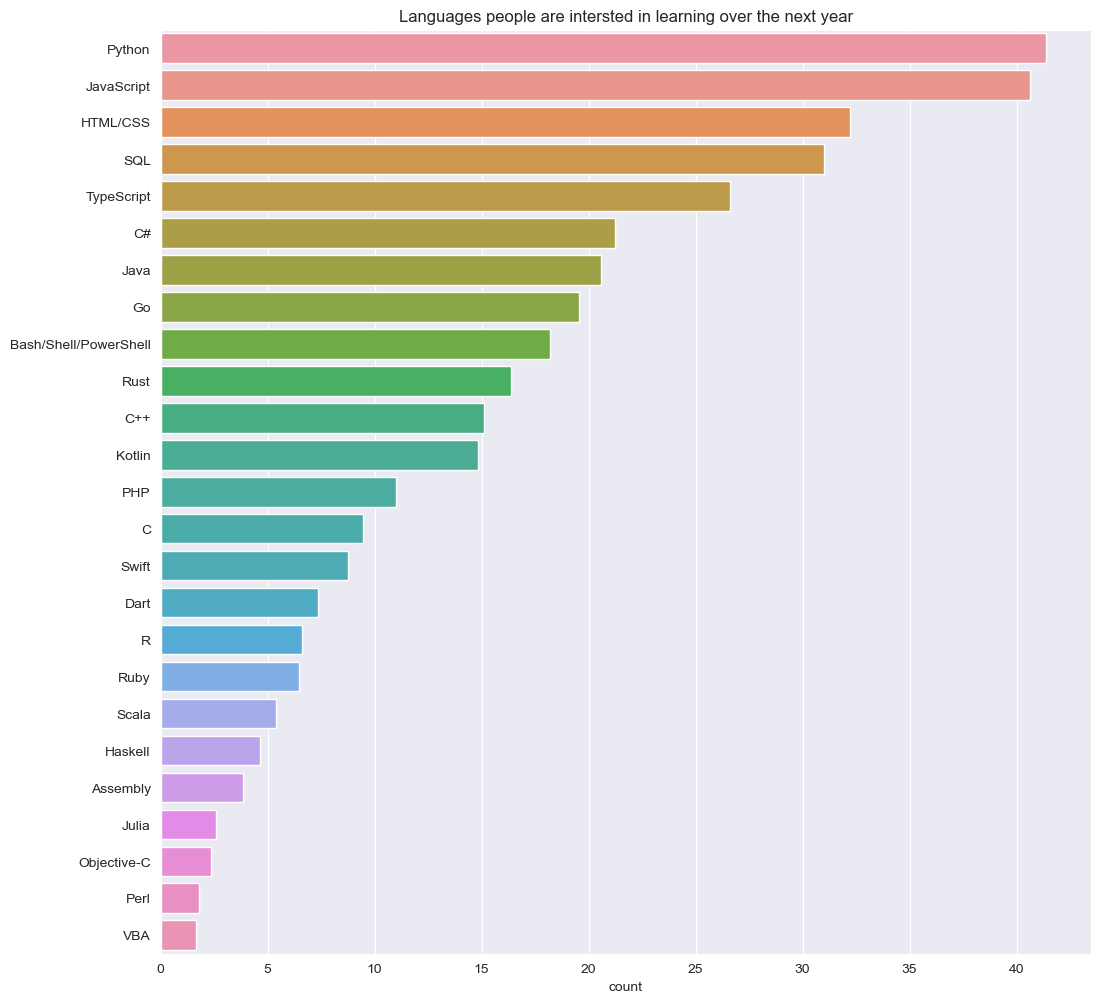

In [16]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

#### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [21]:
languages_loved_df = p_lang & languages_interested_df
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ p_lang.sum()).sort_values(ascending=False)

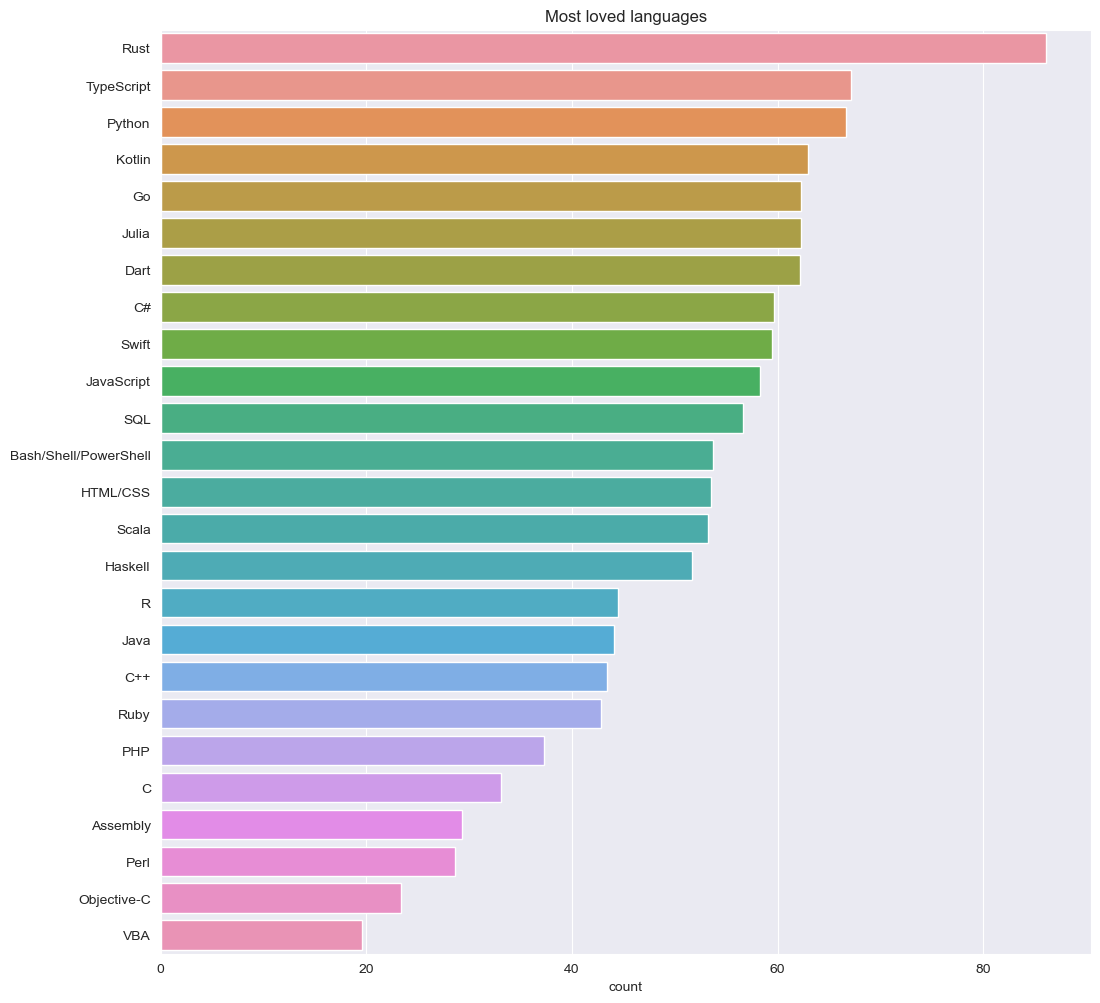

In [26]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [27]:
countries_df = sv.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [30]:
high_response_countries_df = countries_df.loc[sv.Country.value_counts() > 250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Norway,55.451557
Finland,52.694828
Iran,46.012903
Israel,44.744731
Turkey,43.772026
Austria,43.176923
Viet Nam,42.371901
China,42.134752
Hungary,41.926966


#### Q: How important is it to start young to build a career in programming?

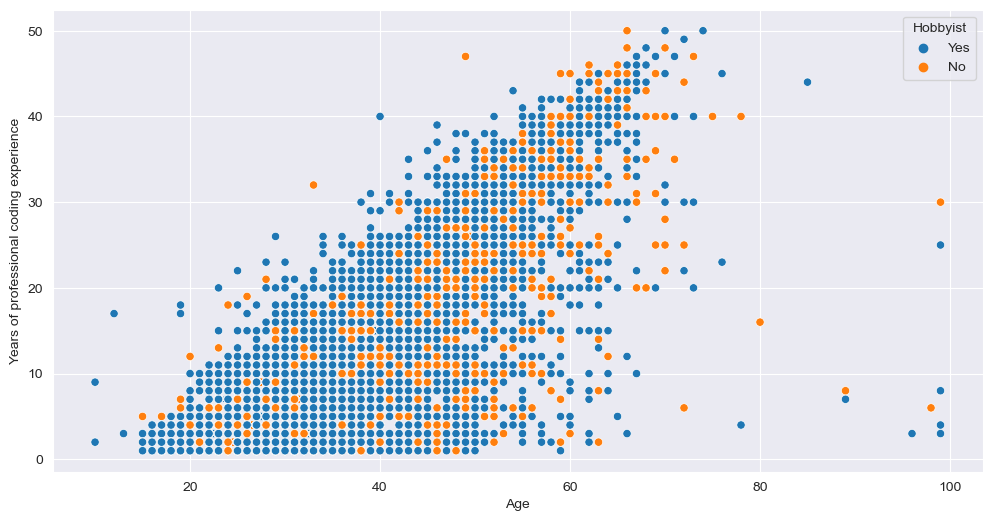

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=sv)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

C:\Users\richu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


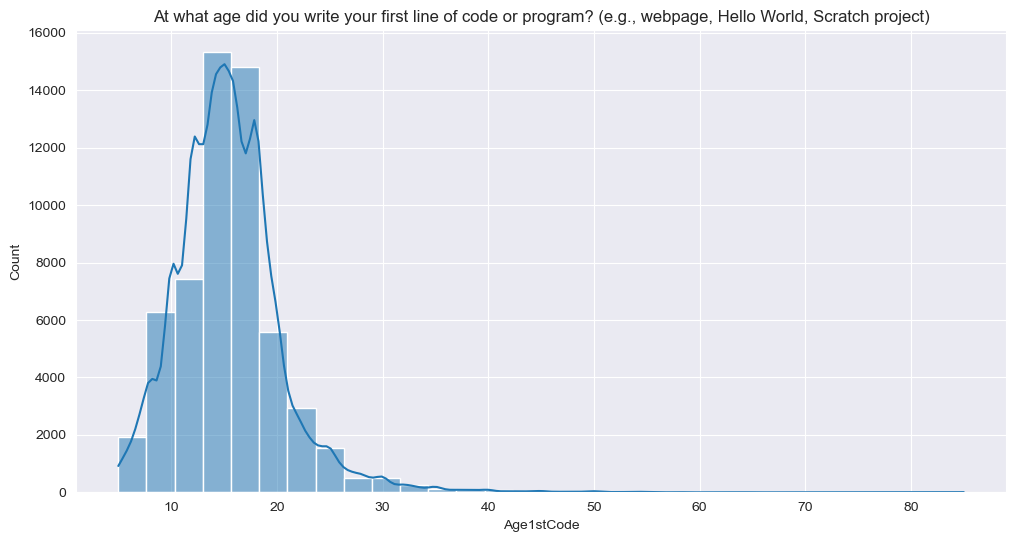

In [39]:
plt.figure(figsize=(12,6))
plt.title(rs.Age1stCode)
sns.histplot(x=sv.Age1stCode, bins=30, kde=True);